### You are a data scientist working for a healthcare company, and you have been tasked with creating a
### decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
### given a dataset (diabetes.csv) with the following variables:
#### 1. Pregnancies: Number of times pregnant (integer)
#### 2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
#### 3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
#### 4. SkinThickness: Triceps skin fold thickness (mm) (integer)
#### 5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
#### 6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
#### 7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
#### based on family history) (float)
#### 8. Age: Age in years (integer)
#### 9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Dataset

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### We can see there are few columns Glucose, BloodPressure, SkinThickness, Insulin, BMI which has values as 0 that is not possible.
#### Let's deal with that, we can either remove such data or simply replace it with their respective mean or median

In [7]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].median())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].median())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].median())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].median())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].median())

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot: >

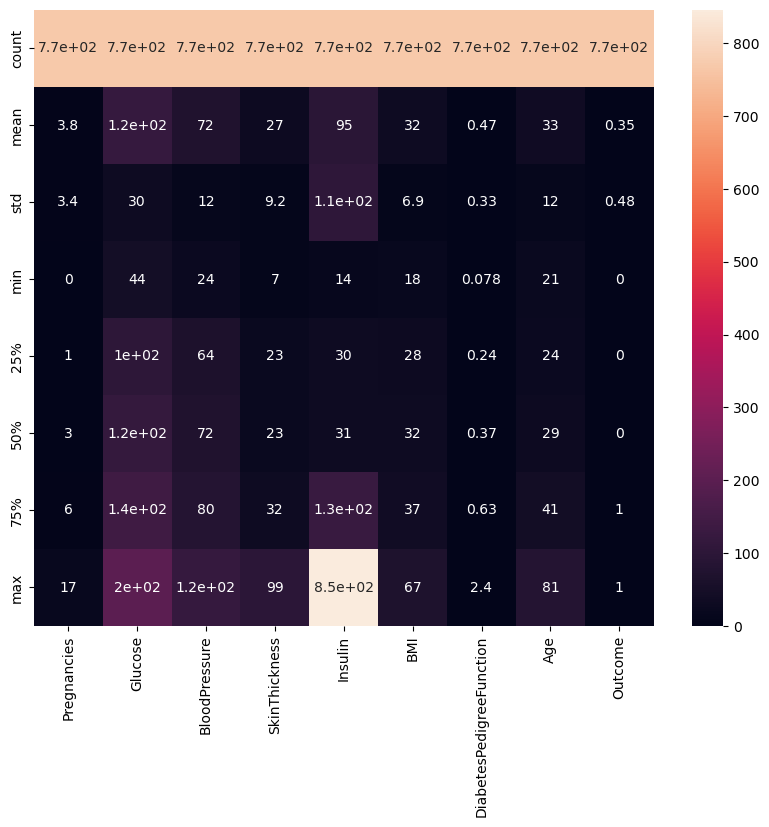

In [9]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(data.describe(),annot=True)

<AxesSubplot: >

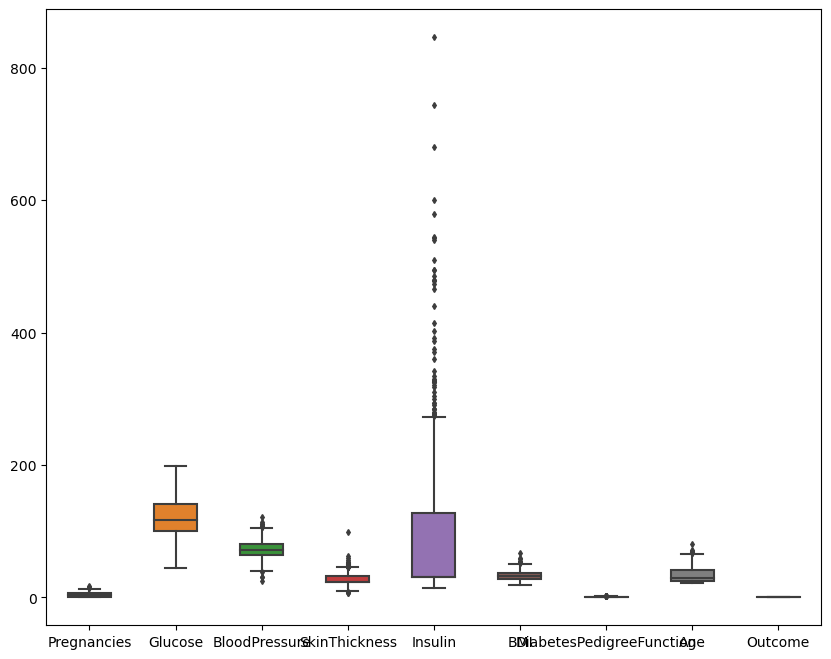

In [10]:
fig ,ax = plt.subplots(figsize=(10,8))
sns.boxplot(data = data, width=0.5, ax= ax ,fliersize=3)

In [11]:
X = data.drop('Outcome',axis=1) 

In [12]:
y = data['Outcome']

In [13]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33


In [14]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=40)

In [16]:
X_train.shape, X_test.shape

((576, 8), (192, 8))

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [92]:
X_test_scaled.shape

(192, 8)

/tmp/ipykernel_77/2616596220.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train After Scaling')

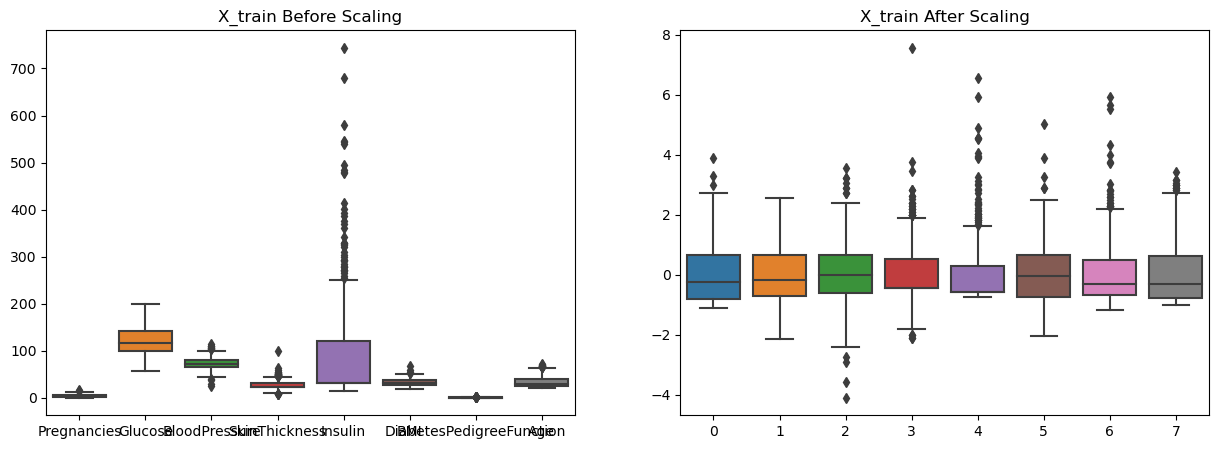

In [18]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data= X_train_scaled)
plt.title('X_train After Scaling')

## Decision Tree Classifier¶

In [62]:
treeClassifier = DecisionTreeClassifier()

### Hyperparameter Tuning

In [63]:
parameter = {
    'criterion' :['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' :[1,2,3,4,5,6,7,8],
    'max_features' :['auto', 'sqrt', 'log2']
}

In [64]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [65]:
clf_treeClassifier = GridSearchCV(treeClassifier,param_grid=parameter,scoring='accuracy', cv= 5)

In [66]:
clf_treeClassifier.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [67]:
clf_treeClassifier.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [68]:
clf_treeClassifier = DecisionTreeClassifier(criterion='entropy', max_depth=4,max_features='log2',splitter='best')

In [69]:
clf_treeClassifier.fit(X_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='log2')

### Let see how well our model Perform on test dataset for Decision Tree Classifier

In [70]:
y_pred = clf_treeClassifier.predict(X_test_scaled)

In [71]:
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1])

In [72]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [73]:
print(accuracy_score(y_pred, y_test))

0.75


print(classification_report(y_pred, y_test))

In [74]:
print(confusion_matrix(y_pred, y_test))

[[102  31]
 [ 17  42]]


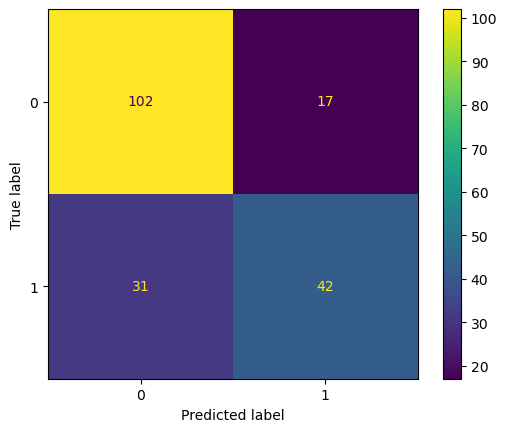

In [75]:
cm_test = confusion_matrix(y_test, y_pred)
t1 = ConfusionMatrixDisplay(cm_test)
t1.plot()

In [76]:
from sklearn.metrics import roc_curve

In [77]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

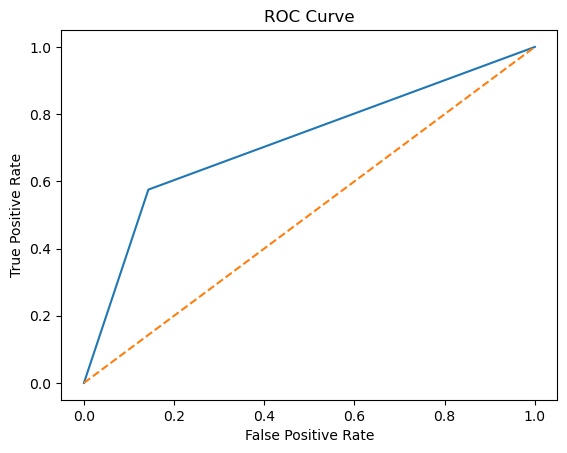

In [78]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

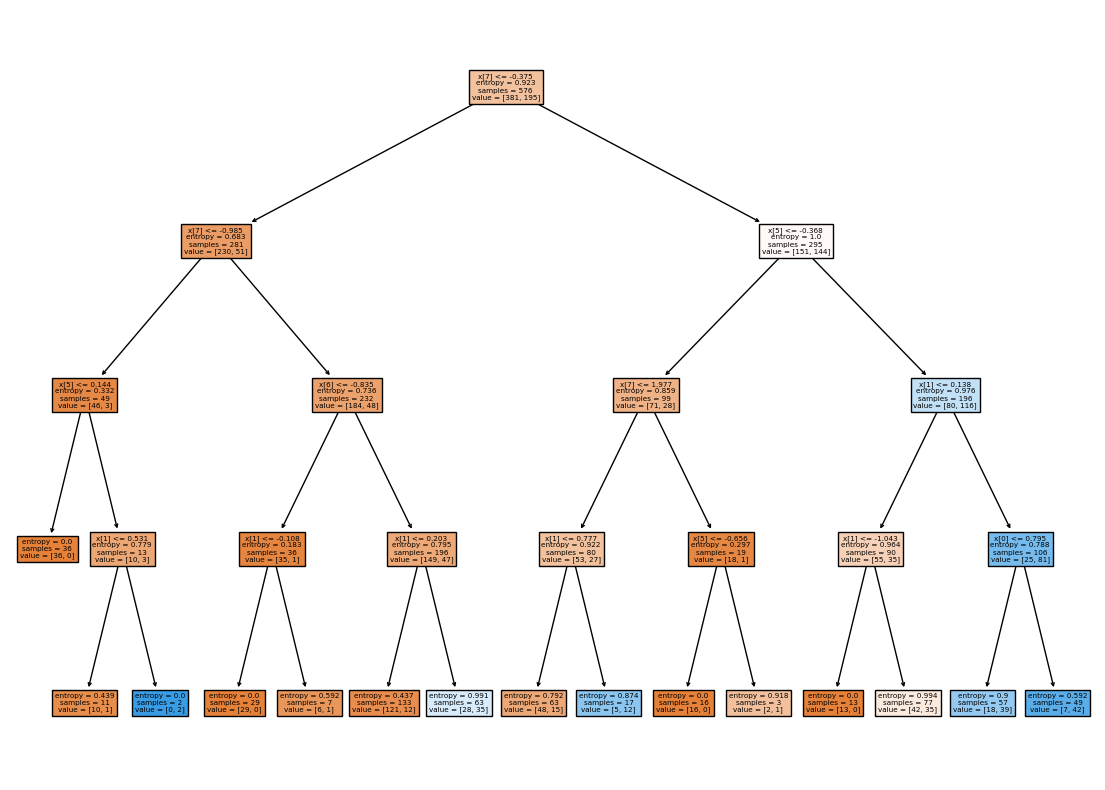

In [83]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(14, 10))
plot_tree(clf_treeClassifier, filled=True)
plt.show()

Tree has been splited from x[1] that is form  Glucose column with their thresholds value 0.283
the column  Pregnancies having greater the log_loss value are in right branch and smaller in left branch.
Tree splited to max_depth = 5

In [97]:
pred_new = scaler.transform([[6,148,72,35,0,33.6,0.627,50]])

In [99]:
clf_treeClassifier.predict(pred_new)

array([1])